### Install PRAW
PMAW: Pushshift Multithread API Wrapper

In [47]:
pip install pmaw

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import pandas as pd

In [50]:
#import PMAW
from pmaw import PushshiftAPI

#initiate
api = PushshiftAPI()

In [51]:
#import PRAW
import praw

### Authentication with OAuth
Guides: 
* https://praw.readthedocs.io/en/latest/getting_started/authentication.html
* https://github.com/reddit-archive/reddit/wiki/OAuth2

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

reddit = praw.Reddit(
    client_id=os.getenv('PRAW_CLIENT_ID'),
    client_secret=os.getenv('PRAW_CLIENT_SECRET'),
    password=os.getenv('PRAW_CLIENT_PASSSWORD'),
    user_agent=os.getenv('PRAW_TESTCRIPT'),
    username=os.getenv('REDDIT_USERNAME'),
)

print(reddit.user.me())

### Explore

In [28]:
#subreddit to scrape
subreddit = reddit.subreddit('pancreaticcancer')

print("Display Name: ", subreddit.display_name)
print("Title:", subreddit.title)
print("Description:", subreddit.description)

Display Name:  pancreaticcancer
Title: Pancreatic Cancer
Description: News and Stories relating to pancreatic cancer, its prevention, diagnosis, and treatment, and those who suffer or have fallen to it.


In [53]:
# get 10 hot submission from the r/pancreaticcancer subreddit
subreddit = reddit.subreddit('pancreaticcancer')
hot_submissions = subreddit.hot(limit=20)
for submission in hot_submissions:
    print(submission.title)

To: "Worried About Cancer" Visitors
Stopping all support for Worried Posts, for now
At a loss
Positivity or denial
Folfirinox failed - - Now what?
Nanoknife/Immunotherapy Phase 2 Trial
What symptoms did you have that led you to go get checked out?
How well chemo has worked for stage IV
He doesn’t want to do biopsy and chemo
How would you describe your pain?
Update
One Year and 3 Months
How does it look like when the end is near?
Update 16 months
Oncologist increased the dosage in second cycle ?
1.4cm mass on pancreas tail
My daughters body is turning on her!
Navigating the Final Mile: Can Alternative Treatments Bring New Hope? Is the end near?
Family history of pc?
Creon Available


### Submission extraction using keywords from a subreddit
search(query: str, *, sort: str = 'relevance', syntax: str = 'lucene', time_filter: str = 'all', **generator_kwargs: Any) → Iterator[praw.models.Submission]

Parameters:

query – The query string to search for.

sort – Can be one of: "relevance", "hot", "top", "new", or "comments". (default: "relevance").

syntax – Can be one of: "cloudsearch", "lucene", or "plain" (default: "lucene").

time_filter – Can be one of: "all", "day", "hour", "month", "week", or "year" (default: "all").

link to tutorial: https://praw.readthedocs.io/en/latest/code_overview/models/subreddit.html#praw.models.Subreddit.hot

For example, to search all subreddits for "praw" try:
    for submission in reddit.subreddit("all").search("praw"):
    print(submission.title)

In [ ]:
#filter submissions by query and year
for submission in subreddit.search('symptoms', 'year'):
    print(submission.title)

C:\Users\chery\AppData\Local\Temp\ipykernel_9636\204972187.py:1: DeprecationWarning: Positional arguments for 'Subreddit.search' will no longer be supported in PRAW 8.
Call this function with 'sort' as a keyword argument.
  for submission in subreddit.search('symptoms', 'year'):


How long did you have symptoms before you got your diagnosis?
Is the pain/symptoms normal
What symptoms did you have that led you to go get checked out?
Denial with no symptoms
Father diagnosed now having symptoms
Symptoms?
A friends mother with stg4 is quitting chemo tomorrow. What can we expect? What all happens, how do symptoms worsen prior to passing?
I feel like the notion that pancreatic cancer does not cause early symptoms is false and that screening desperately needs improvement.
Can you have symptoms at an early stage?
Mom’s post-stroke chemo causing more stroke like symptoms - is this normal?
Worried my symptoms may be pancreatic cancer
Looking for old post--about end stage symptoms
Dad (63) diagnosed two weeks ago after months of symptoms
114 days from first symptoms to crossing over. 
Worried about dads symptoms
Seeking opinions about next steps: mixed scans and increase in symptoms on trial 
Swelling face a first symptom? 
Would someone be willing to talk to me about PC? I

### Comment extraction and parsing from specific submission

In [32]:
#get top comments in specific submission
submission_user_no58w = reddit.submission(url="https://www.reddit.com/r/pancreaticcancer/comments/no58dw/what_were_your_symptoms_before_being_diagnosed/")

'''
#or get top comments from user id
submission = reddit.submission(id="a3p0uq") 
'''
submission_user_no58w.comments.replace_more(limit=None) #replaces the MoreComments
print(submission_user_no58w.title)

for top_level_comment in submission_user_no58w.comments.list():
    print(top_level_comment.body)


What were your symptoms before being diagnosed?
My mom had an on and off pain on her side, like up in her ribs. Then stomach aches after eating. Then back pain. Of course it was all as she was now working from home from covid so she assumed it was because of a lot more sedentary lifestyle and dismissed it as such until the stomach and back pains got worse.
Mine was uncontrollable vomiting, burning, acid reflux, weight loss, fatigue, and intense pain.  It started suddenly on the way home from work one day. We had a potluck that day and I ate a bunch of high fat chicken wings and other pot luck foods...and I literally thought I was going to die a few hours later.  I literally was driving home and had to pull over and vomit about every 10 minutes.  After I threw up on the side of the road 13 times, I decided to head over to the ER instead of going home.  They did a cat scan and found it.
My dad had been feeling more tired than normal, but chalked it up to getting older. Then his skin turn

### Scraping data and creating dataframe

scraping guide: https://medium.com/@archanakkokate/scraping-reddit-data-using-python-and-praw-a-beginners-guide-7047962f5d29

In [55]:
#import time delay function to aoive rate limiting
import time

#create dictionary of keywords to loop through submissions with title and/body 'symptoms', 'symptom', 'sign', 'signs' 
keywords = ['symptoms', 'symptom', 'signs', 'signs']

#creat dataframe
data = []

#scrape for posts with these keywords
for keyword in keywords:
    for post in subreddit.search(keyword, 'all'):
        data.append({
            'Type': 'Post',
            'Post_id': post.id,
            'Title': post.title,
            'Author': post.author.name if post.author else 'Unknown',
            'Timestamp': post.created_utc,
            'Text': post.selftext,
            'Score': post.score,
            'Flair': post.link_flair_text,
            'Total_comments': post.num_comments,
            'Post_URL': post.url
        })

    # Check if the post has comments
        if post.num_comments > 0:
            # Scraping comments for each post
            post.comments.replace_more(limit= None)
            for comment in post.comments.list():
                data.append({
                    'Type': 'Comment',
                    'Post_id': post.id,
                    'Title': post.title,
                    'Author': comment.author.name if comment.author else 'Unknown',
                    'Timestamp': pd.to_datetime(comment.created_utc, unit='s'),
                    'Text': comment.body,
                    'Score': comment.score,
                    'Total_comments': 0, #Comments don't have this attribute
                    'Post_URL': None  #Comments don't have this attribute
                })
    #add delay between requests to avoid rate limiting (seconds)
        time.sleep(5)

C:\Users\chery\AppData\Local\Temp\ipykernel_9636\716776676.py:12: DeprecationWarning: Positional arguments for 'Subreddit.search' will no longer be supported in PRAW 8.
Call this function with 'sort' as a keyword argument.
  for post in subreddit.search(keyword, 'all'):


In [56]:
#input data to dataframe
pancreatic_cancer_data = pd.DataFrame(data)

In [58]:
pancreatic_cancer_data

,Type,Post_id,Title,Author,Timestamp,Text,Score,Flair,Total_comments,Post_URL
0,Post,1bom69c,How long did you have symptoms before you got ...,Regular-Exchange-557,1711494354.0,I know this has been asked but I’m curious how...,29,"worried, no diagnosis",308,https://www.reddit.com/r/pancreaticcancer/comm...
1,Comment,1bom69c,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21,They say hindsight is 20/20 and in my wife's c...,16,NaN,0,None
2,Comment,1bom69c,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50,My dad had started complaining of a stomach ac...,15,NaN,0,None
3,Comment,1bom69c,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20,Had back pain for a month or more before diagn...,12,NaN,0,None
4,Comment,1bom69c,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02,I was complaining to my PCP for EIGHTEEN MONTH...,10,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...
8087,Comment,1idp81z,Grandma been in excruciating pain for hours me...,ddessert,2025-01-31 03:23:37,Perhaps a nerve block? It's a procedure where ...,3,NaN,0,None
8088,Comment,1idp81z,Grandma been in excruciating pain for hours me...,Chewable-Chewsie,2025-01-31 03:08:30,Darn. I’m sorry to hear that. Keep letting us ...,1,NaN,0,None
8089,Comment,1idp81z,Grandma been in excruciating pain for hours me...,Remarkable_Lie7839,2025-01-31 03:50:04,I asked about it once before but they said it ...,1,NaN,0,None
8090,Comment,1idp81z,Grandma been in excruciating pain for hours me...,ddessert,2025-01-31 04:56:03,Sometimes you have to wonder if the real reaso...,1,NaN,0,None


In [ ]:
# Save DataFrame to JSON
pancreatic_cancer_data.to_json('/data/pancreatic_cancer_data_filtered.json', orient='records', lines=True)


#Save DataFrame to CSV
pancreatic_cancer_data.to_csv('/data/pancreatic_cancer_data_filtered.csv')


### REFERENCE

In [35]:
#scrape the hotest 100 posts and all its contents

#define lists to store data
data_hot = []

# scraping hot posts & comments
for post in subreddit.hot(limit= 100): 
    data_hot.append({
        'Type': 'Post',
        'Post_id': post.id,
        'Title': post.title,
        'Author': post.author.name if post.author else 'Unknown',
        'Timestamp': post.created_utc,
        'Text': post.selftext,
        'Score': post.score,
        'Flair': post.link_flair_text,
        'Total_comments': post.num_comments,
        'Post_URL': post.url
    })

# Check if the post has comments
    if post.num_comments > 0:
        # Scraping comments for each post
        post.comments.replace_more(limit= None)
        for comment in post.comments.list():
            data_hot.append({
                'Type': 'Comment',
                'Post_id': post.id,
                'Title': post.title,
                'Author': comment.author.name if comment.author else 'Unknown',
                'Timestamp': pd.to_datetime(comment.created_utc, unit='s'),
                'Text': comment.body,
                'Score': comment.score,
                'Total_comments': 0, #Comments don't have this attribute
                'Post_URL': None  #Comments don't have this attribute
            })
#add delay between requests to avoid rate limiting
    time.sleep(2)

headneck_cancer_data_hot= pd.DataFrame(data_hot)

In [37]:
headneck_cancer_data_hot

,Type,Post_id,Title,Author,Timestamp,Text,Score,Flair,Total_comments,Post_URL
0,Post,1fqzv63,H&N Cancer Wiki,StockFaucet,1727476012.0,I was wondering if anyone ever checked out the...,2,Poll,1,https://www.reddit.com/r/HeadandNeckCancer/com...
1,Comment,1fqzv63,H&N Cancer Wiki,StockFaucet,2024-10-29 02:04:06,You may want to give the wiki a chance? It's a...,1,NaN,0,None
2,Post,1fasyo9,Welcome - Please read this before posting.,StockFaucet,1725664661.0,We're sorry you have found yourself in the cir...,7,None,2,https://www.reddit.com/r/HeadandNeckCancer/com...
3,Comment,1fasyo9,Welcome - Please read this before posting.,Unknown,2024-09-07 04:11:10,[removed],2,NaN,0,None
4,Comment,1fasyo9,Welcome - Please read this before posting.,HeadandNeckCancer-ModTeam,2024-09-08 04:07:44,Confusion. I removed the original post. I want...,3,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...
1265,Comment,1fxaf8f,Question,TVIXPaulSPY,2024-10-08 19:33:36,After my radiation and chemo treatment was ove...,2,NaN,0,None
1266,Comment,1fxaf8f,Question,liz-ard47,2024-10-08 01:09:49,"Thank you all for the responses, I appreciate it.",1,NaN,0,None
1267,Comment,1fxaf8f,Question,FindingNo2931,2024-10-07 00:33:41,This is the norm,2,NaN,0,None
1268,Comment,1fxaf8f,Question,838jenxjeod,2024-10-06 17:34:44,I had cancer for 18-24 months without even kno...,3,NaN,0,None


In [38]:
headneck_cancer_data_hot.to_json('headneck_cancer_data_hot.json', orient='records', lines=True)

### EDA

In [64]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     --------------------------------- ----- 92.2/106.6 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 106.6/106.6 kB 2.0 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.1 MB 12.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.1 MB 21.8 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 22.9 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 23.9 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 23.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.5/8.1 MB 24.3 MB/s eta 0:00:01
   ------------------------------------- -- 7.7/8.1 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [118]:
pc_data = pd.read_json('pancreatic_cancer_data_filtered.json', lines=True)

In [119]:
pc_data.head()

,Type,Post_id,Title,Author,Timestamp,Text,Score,Flair,Total_comments,Post_URL
0,Post,1bom69c,How long did you have symptoms before you got ...,Regular-Exchange-557,1970-01-20 19:24:54.354,I know this has been asked but I’m curious how...,29,"worried, no diagnosis",308,https://www.reddit.com/r/pancreaticcancer/comm...
1,Comment,1bom69c,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21.000,They say hindsight is 20/20 and in my wife's c...,16,None,0,None
2,Comment,1bom69c,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50.000,My dad had started complaining of a stomach ac...,15,None,0,None
3,Comment,1bom69c,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20.000,Had back pain for a month or more before diagn...,12,None,0,None
4,Comment,1bom69c,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02.000,I was complaining to my PCP for EIGHTEEN MONTH...,10,None,0,None


In [120]:
pc_data.shape

(8092, 10)

In [121]:
# Remove duplicates based on the 'id' column
pc_df = pc_data.drop_duplicates(subset=['Post_id','Title', 'Author','Text'])
pc_df.shape

(3855, 10)

In [122]:
pc_df.head()

,Type,Post_id,Title,Author,Timestamp,Text,Score,Flair,Total_comments,Post_URL
0,Post,1bom69c,How long did you have symptoms before you got ...,Regular-Exchange-557,1970-01-20 19:24:54.354,I know this has been asked but I’m curious how...,29,"worried, no diagnosis",308,https://www.reddit.com/r/pancreaticcancer/comm...
1,Comment,1bom69c,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21.000,They say hindsight is 20/20 and in my wife's c...,16,None,0,None
2,Comment,1bom69c,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50.000,My dad had started complaining of a stomach ac...,15,None,0,None
3,Comment,1bom69c,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20.000,Had back pain for a month or more before diagn...,12,None,0,None
4,Comment,1bom69c,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02.000,I was complaining to my PCP for EIGHTEEN MONTH...,10,None,0,None


In [123]:
#checking data types
pc_df.dtypes

Type                      object
Post_id                   object
Title                     object
Author                    object
Timestamp         datetime64[ns]
Text                      object
Score                      int64
Flair                     object
Total_comments             int64
Post_URL                  object
dtype: object

In [124]:
pc_df.describe()

,Timestamp,Score,Total_comments
count,3855,3855.000000,3855.000000
mean,2021-10-11 22:36:15.657103104,3.625940,0.960311
min,1970-01-18 22:52:19.496000,-11.000000,0.000000
25%,2024-04-03 20:47:51,1.000000,0.000000
50%,2024-12-31 18:14:13,2.000000,0.000000
75%,2025-03-24 19:47:19.500000,3.000000,0.000000
max,2025-05-26 07:00:54,160.000000,308.000000
std,NaN,8.009572,7.111918


In [125]:
pc_df.isna().sum()

Type                 0
Post_id              0
Title                0
Author               0
Timestamp            0
Text                 0
Score                0
Flair             3793
Total_comments       0
Post_URL          3659
dtype: int64

In [126]:
pc_df.columns

Index(['Type', 'Post_id', 'Title', 'Author', 'Timestamp', 'Text', 'Score',
       'Flair', 'Total_comments', 'Post_URL'],
      dtype='object')

In [127]:
#drop redundant columns
pc_df.drop(['Score','Flair','Total_comments','Post_URL'], axis=1, inplace=True)
pc_df.head()

,Type,Post_id,Title,Author,Timestamp,Text
0,Post,1bom69c,How long did you have symptoms before you got ...,Regular-Exchange-557,1970-01-20 19:24:54.354,I know this has been asked but I’m curious how...
1,Comment,1bom69c,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21.000,They say hindsight is 20/20 and in my wife's c...
2,Comment,1bom69c,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50.000,My dad had started complaining of a stomach ac...
3,Comment,1bom69c,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20.000,Had back pain for a month or more before diagn...
4,Comment,1bom69c,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02.000,I was complaining to my PCP for EIGHTEEN MONTH...


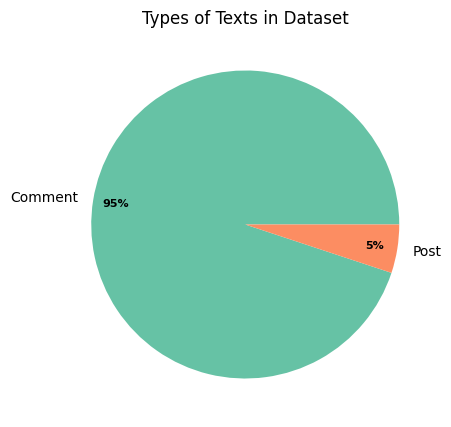

In [128]:
#understanding your dataset: what are the type of texts? posts or comments?
text_type_df = (pd.DataFrame(
    pc_df.value_counts('Type')
    .reset_index()
))

text_type_df.columns = ['Type', 'count']

colors = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
# Function to only show percentage if it's above 5%
def func(pct, allvals):
    return f"{pct:.0f}%"

# Determine explode values: exploding slices less than 5%
#explode = [0.2 if (x/sum(flair_df['count']) * 100) < 1 else 0 for x in flair_df['count']]

# Creating the pie chart with conditional labeling and exploding
wedges, texts, autotexts = ax.pie(text_type_df['count'], labels=text_type_df['Type'], autopct=lambda pct: func(pct, text_type_df['count']),
                                  textprops={'color': "black"}, colors=colors, pctdistance=0.85, labeldistance=1.1)
                                         
plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Types of Texts in Dataset")                                        
plt.show()

### Fixing timestamp errors

In [ ]:
pc_df['Year'] = pc_df['Timestamp'].dt.year
mistyped = pc_df[(pc_df['Year'] < 2000) | (pc_df['Year'] > 2025)]

pd.set_option('display.max_rows', None)
mistyped

,Type,Post_id,Title,Author,Timestamp,Text,Date,Year
314,Post,1keedpg,Is the pain/symptoms normal,Wild_Basil_3177,1970-01-21 05:05:44.623,"\nHi everyone, I’m looking for advice or if an...",1970-01-21,1970
341,Post,1kvd6bk,What symptoms did you have that led you to go ...,Plus-Quantity5935,1970-01-21 05:36:47.412,I was just wondering what symptoms you had tha...,1970-01-21,1970
354,Post,1g5h1gd,Denial with no symptoms,CozySoul4412,1970-01-21 00:18:53.402,"Hi everyone,\n\nThe whole family seems to be i...",1970-01-21,1970
393,Post,1hb3ydo,Father diagnosed now having symptoms,Character_Couple9772,1970-01-21 01:37:23.591,Father (75) diagnosed with PC about a month ag...,1970-01-21,1970
407,Post,1iuzpoe,Symptoms?,TeamDan1,1970-01-21 03:22:46.959,What are signs that the end is within weeks???...,1970-01-21,1970
411,Post,1i68s97,A friends mother with stg4 is quitting chemo t...,psionicbunny,1970-01-21 02:37:08.133,My friend doesn’t use reddit so I’m posting th...,1970-01-21,1970
418,Post,1bopql7,I feel like the notion that pancreatic cancer ...,chalogr,1970-01-20 19:25:03.351,I have been doing a lot of research on pancrea...,1970-01-20,1970
448,Post,1bevq3y,Can you have symptoms at an early stage?,Lizz66UK,1970-01-20 19:07:29.563,My father has diabetes 2 and noticed his blood...,1970-01-20,1970
481,Post,1hp4x6n,Mom’s post-stroke chemo causing more stroke li...,Timidtigerrr,1970-01-21 02:05:03.913,"Hi all, \n\nHoping someone can give some insig...",1970-01-21,1970
485,Post,13sr1xv,Worried my symptoms may be pancreatic cancer,ornge23,1970-01-20 12:05:41.690,"Hi, I am 27F with 20BMI. Otherwise healthy. Gr...",1970-01-20,1970


In [148]:
# List or set of Post_ids to fix (example: unique Post_ids from your 193 mistyped ones)
post_ids_to_fix = mistyped['Post_id'].unique()  # Or a filtered list of problem IDs

for post_id in post_ids_to_fix:
    try:
        submission = reddit.submission(id=post_id)
        correct_timestamp = pd.to_datetime(submission.created_utc, unit='s')

        # Update all rows with this post_id
        mask = mistyped['Post_id'] == post_id
        mistyped.loc[mask, 'Timestamp'] = correct_timestamp
        mistyped.loc[mask, 'Date'] = correct_timestamp.date()
        mistyped.loc[mask, 'Year'] = correct_timestamp.year

        print(f"Updated timestamps for Post_id {post_id} to {correct_timestamp}")

    except Exception as e:
        print(f"Error fetching post {post_id}: {e}")

Updated timestamps for Post_id 1keedpg to 2025-05-04 07:43:43
Updated timestamps for Post_id 1kvd6bk to 2025-05-25 21:10:12
Updated timestamps for Post_id 1g5h1gd to 2024-10-17 02:50:02
Updated timestamps for Post_id 1hb3ydo to 2024-12-10 15:13:11
Updated timestamps for Post_id 1iuzpoe to 2025-02-21 19:42:39
Updated timestamps for Post_id 1i68s97 to 2025-01-21 02:55:33
Updated timestamps for Post_id 1bopql7 to 2024-03-27 01:35:51
Updated timestamps for Post_id 1bevq3y to 2024-03-14 20:52:43
Updated timestamps for Post_id 1hp4x6n to 2024-12-29 20:25:13
Updated timestamps for Post_id 13sr1xv to 2023-05-26 22:54:50
Updated timestamps for Post_id 1drrosz to 2024-06-30 02:48:09
Updated timestamps for Post_id 1duwlu5 to 2024-07-04 03:02:28
Updated timestamps for Post_id 1c58tta to 2024-04-16 06:02:57
Updated timestamps for Post_id 1cv9drb to 2024-05-18 22:42:53
Updated timestamps for Post_id 1ge6wbz to 2024-10-28 16:48:54
Updated timestamps for Post_id 1fu3byq to 2024-10-02 00:17:59
Updated 

In [150]:
pd.reset_option('display.max_rows')
mistyped

,Type,Post_id,Title,Author,Timestamp,Text,Date,Year
314,Post,1keedpg,Is the pain/symptoms normal,Wild_Basil_3177,2025-05-04 07:43:43,"\nHi everyone, I’m looking for advice or if an...",2025-05-04,2025
341,Post,1kvd6bk,What symptoms did you have that led you to go ...,Plus-Quantity5935,2025-05-25 21:10:12,I was just wondering what symptoms you had tha...,2025-05-25,2025
354,Post,1g5h1gd,Denial with no symptoms,CozySoul4412,2024-10-17 02:50:02,"Hi everyone,\n\nThe whole family seems to be i...",2024-10-17,2024
393,Post,1hb3ydo,Father diagnosed now having symptoms,Character_Couple9772,2024-12-10 15:13:11,Father (75) diagnosed with PC about a month ag...,2024-12-10,2024
407,Post,1iuzpoe,Symptoms?,TeamDan1,2025-02-21 19:42:39,What are signs that the end is within weeks???...,2025-02-21,2025
...,...,...,...,...,...,...,...,...
6515,Post,1ip41ve,Advice for back pain?,bigdaddy905,2025-02-14 06:02:47,My mom (67) has stage 4 pancreatic cancer with...,2025-02-14,2025
6525,Post,1ees7yo,Mom passed,NewFlight6297,2024-07-29 06:02:07,My mom just passed from this monster 4 months ...,2024-07-29,2024
6554,Post,1ikjk08,Mass found on Mom’s pancreas with liver mets l...,Unlikely-Marzipan143,2025-02-08 09:25:33,My mom has been having difficulty swallowing f...,2025-02-08,2025
6563,Post,1k8ti7l,Likelihood of PC given a history of pancreatic...,Watusi_Muchacho,2025-04-27 02:22:53,Greetings. I had pancreatic stones removed ar...,2025-04-27,2025


In [151]:
#Merge updated to main dataset

#create copy of pc_df called pc_df_upd
pc_df_upd = pc_df

pc_df_upd.set_index('Post_id', inplace=True)
mistyped.set_index('Post_id', inplace=True)

# Update timestamp columns from mistyped to pc_df
pc_df_upd.update(mistyped[['Timestamp', 'Date', 'Year']])

# Reset index back if you want
pc_df_upd.reset_index(inplace=True)

pc_df_upd

,Post_id,Type,Title,Author,Timestamp,Text,Date,Year
0,1bom69c,Post,How long did you have symptoms before you got ...,Regular-Exchange-557,2024-03-27 19:24:54.354,I know this has been asked but I’m curious how...,2024-03-27,2024
1,1bom69c,Comment,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21.000,They say hindsight is 20/20 and in my wife's c...,2024-03-27,2024
2,1bom69c,Comment,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50.000,My dad had started complaining of a stomach ac...,2024-03-26,2024
3,1bom69c,Comment,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20.000,Had back pain for a month or more before diagn...,2024-03-26,2024
4,1bom69c,Comment,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02.000,I was complaining to my PCP for EIGHTEEN MONTH...,2024-03-27,2024
...,...,...,...,...,...,...,...,...
3850,1idp81z,Comment,Grandma been in excruciating pain for hours me...,ddessert,2025-01-30 15:17:38.000,Perhaps a nerve block? It's a procedure where ...,2025-01-30,2025
3851,1idp81z,Comment,Grandma been in excruciating pain for hours me...,Chewable-Chewsie,2025-01-30 15:17:38.000,Darn. I’m sorry to hear that. Keep letting us ...,2025-01-30,2025
3852,1idp81z,Comment,Grandma been in excruciating pain for hours me...,Remarkable_Lie7839,2025-01-30 15:17:38.000,I asked about it once before but they said it ...,2025-01-30,2025
3853,1idp81z,Comment,Grandma been in excruciating pain for hours me...,ddessert,2025-01-30 15:17:38.000,Sometimes you have to wonder if the real reaso...,2025-01-30,2025


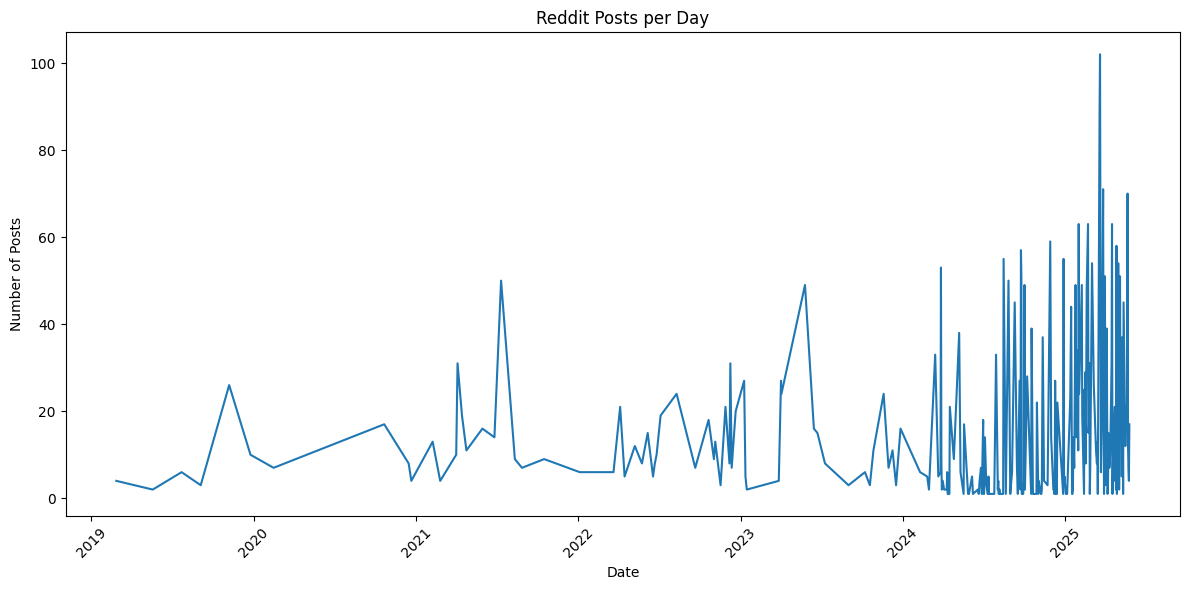

In [152]:
#Visualize Post and Comment Timestamps
import matplotlib.pyplot as plt

#convert timestamp to datetime
pc_df_upd['Timestamp'] = pd.to_datetime(pc_df_upd['Timestamp'])

pc_df_upd['Date'] = pc_df_upd['Timestamp'].dt.date
posts_per_day = pc_df_upd.groupby('Date').size()

#plot with matplotlib.pyplot
plt.figure(figsize=(12,6))
posts_per_day.plot(kind='line')  # You can also use 'bar'
plt.title('Reddit Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Data Processing

In [ ]:
pc_df_clean = (pc_df_upd.drop(['Type', 'Title', 'Author', 'Timestamp'],axis=1))

# Save DataFrame to JSON
pc_df_clean.to_json('/data/pc_df_clean.json', orient='records', lines=True)


#Save DataFrame to CSV
pc_df_clean.to_csv('/data/pc_df_clean.csv')

pc_df_clean

,Post_id,Text,Date,Year
0,1bom69c,I know this has been asked but I’m curious how...,2024-03-27,2024
1,1bom69c,They say hindsight is 20/20 and in my wife's c...,2024-03-27,2024
2,1bom69c,My dad had started complaining of a stomach ac...,2024-03-26,2024
3,1bom69c,Had back pain for a month or more before diagn...,2024-03-26,2024
4,1bom69c,I was complaining to my PCP for EIGHTEEN MONTH...,2024-03-27,2024
...,...,...,...,...
3850,1idp81z,Perhaps a nerve block? It's a procedure where ...,2025-01-30,2025
3851,1idp81z,Darn. I’m sorry to hear that. Keep letting us ...,2025-01-30,2025
3852,1idp81z,I asked about it once before but they said it ...,2025-01-30,2025
3853,1idp81z,Sometimes you have to wonder if the real reaso...,2025-01-30,2025


In [162]:
pc_df_clean.isna().sum()

Post_id    0
Text       0
Date       0
Year       0
dtype: int64

In [174]:
#import clean dataset

pc_df_clean = pd.read_json("C:/Users/chery/OneDrive/Desktop/CP2 Codes/pc_df_clean.json", lines = 'True')

In [175]:
#Preprocessing and cleaning texts for initial anlaysis

import re
import string
import numpy as property
import pandas as pd

def clean_text(text):
    # Convert to string first to avoid errors with regex
    if pd.isna(text) or str(text).strip() == "":
        return np.nan  # Treat empty or missing values as NaN
    
    # Convert to lower case
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)

    # Remove unwanted special characters, keep common punctuation
    text = re.sub(r"[^a-zA-Z0-9\s.,!?;:'\"()\[\]\-]", '', text)

    # Replace line breaks and extra spaces with a single space
    text = text.replace('\n', ' ').strip()
    text = re.sub(r'\s+', ' ', text)
    
    return text

In [176]:
pc_df_clean['clean_text'] = pc_df_clean['Text'].apply(clean_text)
pc_df_clean['clean_text']

0       i know this has been asked but im curious how ...
1       they say hindsight is 2020 and in my wife's ca...
2       my dad had started complaining of a stomach ac...
3       had back pain for a month or more before diagn...
4       i was complaining to my pcp for eighteen month...
                              ...                        
3850    perhaps a nerve block? it's a procedure where ...
3851    darn. im sorry to hear that. keep letting us k...
3852    i asked about it once before but they said it ...
3853    sometimes you have to wonder if the real reaso...
3854    asked again and she just signed the consent fo...
Name: clean_text, Length: 3855, dtype: object

In [188]:
pc_df_clean.isna().sum()

Post_id       0
Text          0
Date          0
Year          0
clean_text    7
dtype: int64

In [187]:
pc_df_clean[pc_df_clean['clean_text'].isna()]


,Post_id,Text,Date,Year,clean_text
782,wkudyc,,2022-08-10,2022,NaN
907,vs393i,,2022-07-05,2022,NaN
926,1672c54,,2023-09-01,2023,NaN
1019,dsyp5g,,2019-11-07,2019,NaN
1091,yxkx9t,,2022-11-17,2022,NaN
2646,twse0z,,2022-04-05,2022,NaN
2769,lr3zaf,,2021-02-24,2021,NaN


In [189]:
#removing missing values from the dataset as they don't provide information to our analysis
pc_df_clean.dropna(subset=['clean_text'], inplace=True)
pc_df_clean

,Post_id,Text,Date,Year,clean_text
0,1bom69c,I know this has been asked but I’m curious how...,2024-03-27,2024,i know this has been asked but im curious how ...
1,1bom69c,They say hindsight is 20/20 and in my wife's c...,2024-03-27,2024,they say hindsight is 2020 and in my wife's ca...
2,1bom69c,My dad had started complaining of a stomach ac...,2024-03-26,2024,my dad had started complaining of a stomach ac...
3,1bom69c,Had back pain for a month or more before diagn...,2024-03-26,2024,had back pain for a month or more before diagn...
4,1bom69c,I was complaining to my PCP for EIGHTEEN MONTH...,2024-03-27,2024,i was complaining to my pcp for eighteen month...
...,...,...,...,...,...
3850,1idp81z,Perhaps a nerve block? It's a procedure where ...,2025-01-30,2025,perhaps a nerve block? it's a procedure where ...
3851,1idp81z,Darn. I’m sorry to hear that. Keep letting us ...,2025-01-30,2025,darn. im sorry to hear that. keep letting us k...
3852,1idp81z,I asked about it once before but they said it ...,2025-01-30,2025,i asked about it once before but they said it ...
3853,1idp81z,Sometimes you have to wonder if the real reaso...,2025-01-30,2025,sometimes you have to wonder if the real reaso...


### Explore clean_text

In [190]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/301.2 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


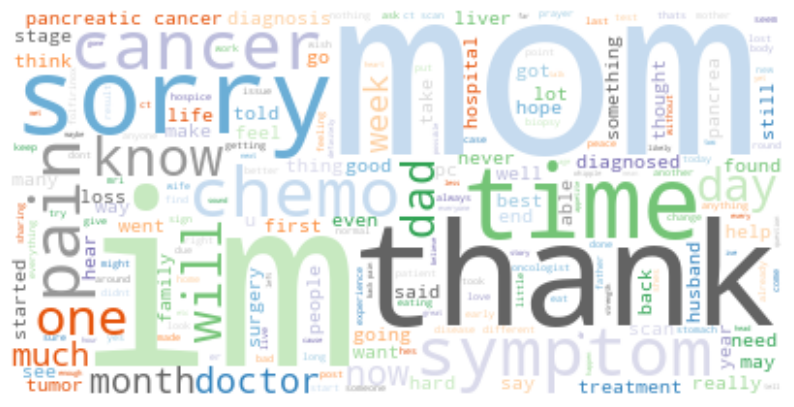

In [191]:
#all words
from wordcloud import WordCloud, STOPWORDS

text = " ".join(pc_df_clean['clean_text'].dropna())

# remove words that are likely to dominate the contents 

text_cloud = WordCloud(
    stopwords = STOPWORDS,
    colormap = 'tab20c',
    background_color = 'white',
    collocations = True).generate(text)

fig = plt.figure(figsize = (10,7))
plt.imshow(text_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

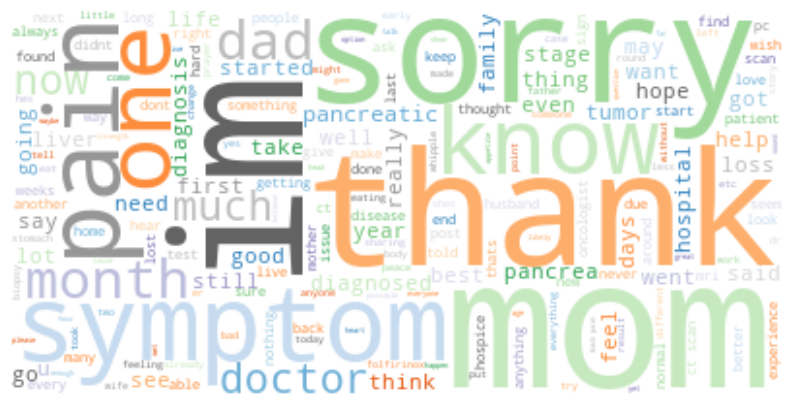

In [193]:
#without custom stopwords

text = " ".join(pc_df_clean['clean_text'].dropna())

# remove words that are likely to dominate the contents 
custom_stopwords = {'cancer',
                    'treatment',
                    'radiation',
                    'chemo',
                    's',
                    'time',
                    'week',
                    'day',
                    'surgery',
                    'will',
                    'm'}

text_cloud = WordCloud(
    stopwords = STOPWORDS.union(custom_stopwords),
    colormap = 'tab20c',
    background_color = 'white',
    collocations = True).generate(text)

fig = plt.figure(figsize = (10,7))
plt.imshow(text_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [94]:
#Sanity check to understand the context in which certain words were used 
from pprint import pprint

print("thing:\n")
pprint(list(reshaped_df[reshaped_df['clean_text'].str.contains(r'\btime\b')].clean_text)[:10], width=300)

print("one:\n")
pprint(list(reshaped_df[reshaped_df['clean_text'].str.contains(r'\bone\b')].clean_text)[:10], width=300)

print("still:\n")
pprint(list(reshaped_df[reshaped_df['clean_text'].str.contains(r'\bbad\b')].clean_text)[:10], width=300)

thing:

['one day at a time. it gets rough, very rough, but we all get thru it. best of experience to you. keep a good attitude. when u can. get a good support system 👏🏼👏🏼👌🏼👍🏽',
 "congrats on finishing up treatment! i finished my 33 rounds oct. 7, and last week was tough. keep eating what you can when you can. it does get better. a week and a half out, i'm able to eat soft foods without lidocaine. still can't handle spicy stuff or anything with a lot of chewing. and i "
 "have to be careful adding solid foods because my stomach shrunk so much the last few weeks. just take it a day at a time and you'll get there!",
 'good for you!   you are in the worst of it now unfortunately.  however, the end is closer than it was yesterday.   your taste and salivary production will prob be the bane of your existence for some time.  i’m 9 months out and just now enjoying meals.  the return of taste is slow and it ebbed '
 'and flowed (no sweet taste one day/week then a week late sweet is the only thi

### Topic Modelling

In [95]:
#Import the vectorizer

import nltk

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif nltk_pos.startswith('V'):
        return wordnet.VERB  # Verb
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN  # Noun
    elif nltk_pos.startswith('R'):
        return wordnet.ADV   # Adverb
    else:
        return None 

lemmatizer = WordNetLemmatizer()

#Adding generic words and non-relevant words to the stopwords list 
#based on wordcloud and results from manually scanning the contents

new_stopwords = {'back','go','like','get','take','feel','see','also','will','would','lot','stuff','maybe','even',
                'actually','probably','may','sure','post','around','one','still','someone','thing','analyst','might','want',
                'well','two','pretty','anything','something','already','never','able','ago','bit','cause','cuz','basically',
                'yes','no','never','almost','anyone'} 
custom_stopwords.update(new_stopwords)
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Filter out non-alphabetic tokens
    pos_tags = nltk.pos_tag(tokens)  # Part-of-speech tagging
    lemmatized = []
    for word, pos_tag in pos_tags:
        wordnet_pos = get_wordnet_pos(pos_tag)
        if wordnet_pos is not None:
            lemma = lemmatizer.lemmatize(word, wordnet_pos)
            lemmatized.append(lemma)

    # Replace 'analysis' with 'analytics' after lemmatization
    lemmatized = ['analytics' if word == 'analysis' else word for word in lemmatized]

    lemmatized = [word for word in lemmatized if word not in stop_words]  # Remove stopwords
    return ' '.join(lemmatized)

tokenized = reshaped_df['clean_text'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chery\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chery\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chery\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chery\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [96]:
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

#we will test with both bigrams and trigrams as a lot of phrases were used in the comments
vect = TfidfVectorizer(max_features = 100, ngram_range = (1,2), min_df = 5, max_df = 0.5).fit(tokenized)

X_text = vect.fit_transform(tokenized)

#changing sparse matrix into dataframe to be more readable
X_df = pd.DataFrame(X_text.toarray(), columns = vect.get_feature_names_out())

In [97]:
X_df.head()

,ask,bad,best,big,biopsy,care,cisplatin,come,different,doctor,...,tube,tumor,use,wait,water,way,weight,wish,work,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


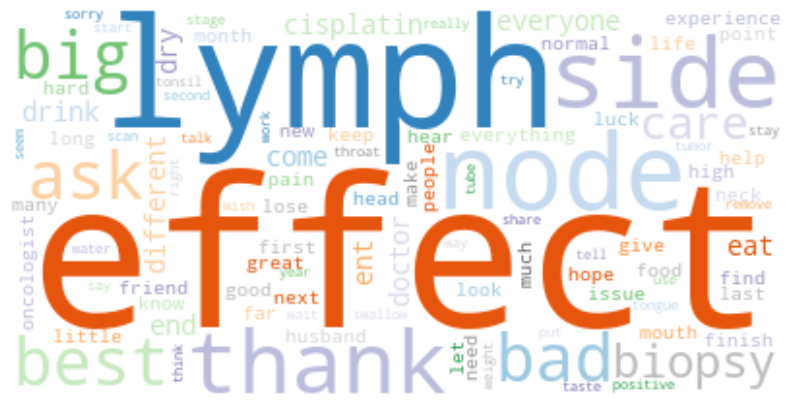

In [99]:
string = ' '.join(X_df.columns)

text_cloud = WordCloud(
    stopwords = STOPWORDS.union(custom_stopwords),
    colormap = 'tab20c',
    background_color = 'white',
    collocations = True).generate(string)

fig = plt.figure(figsize = (10,7))
plt.imshow(text_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [101]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, 
                                      random_state=42,
                                      learning_method = 'online')

#to fit the LDA model, we have to use the sparse matrix
lda_model.fit(X_text)

lda_output = lda_model.fit_transform(X_text)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=5,
                          random_state=42)


In [102]:
#Examining model performance before tuning

print("Log Likelihood: ", lda_model.score(X_text))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(X_text))

Log Likelihood:  -31573.744127172773
Perplexity:  188.11387139135454


In [103]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tf_feature_names = vect.get_feature_names_out()
display_topics(lda_model, tf_feature_names, no_top_words=10)

Topic 0:
thanks hope sorry effect side best care luck side effect life
Topic 1:
neck scan ask doctor tongue say need first node husband
Topic 2:
use eat help mouth make tube taste food find water
Topic 3:
thank share much stay keep hear great positive try way
Topic 4:
know work year wish say good think people look give


In [104]:
# HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV

search_params = {
  'n_components': [5, 8, 10, 15, 20], # Number of topics
  'learning_decay': [.5, .7, .9],  # Learning decay
  'learning_offset': [10, 50, 100],  # Learning offset
  'max_iter': [10, 50, 100]  # Max learning iterations
}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
rs_model = RandomizedSearchCV(lda, param_distributions=search_params, n_iter=10)

# Do the Random Search
rs_model.fit(X_text)

# Best Model
best_lda_model = rs_model.best_estimator_

In [105]:
# Model Parameters
print("Best Model's Params: ", rs_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", rs_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X_text))

Best Model's Params:  {'n_components': 5, 'max_iter': 100, 'learning_offset': 100, 'learning_decay': 0.5}
Best Log Likelihood Score:  -6851.033037462794
Model Perplexity:  189.3257001329213


In [106]:
tuned_lda_model = LatentDirichletAllocation(n_components=5, 
                                            random_state= 42,
                                            learning_offset = 100,
                                            learning_decay = 0.5,
                                            learning_method = 'online',
                                            max_iter = 100)

tuned_lda_model.fit(X_text)

LatentDirichletAllocation(learning_decay=0.5, learning_method='online',
                          learning_offset=100, max_iter=100, n_components=5,
                          random_state=42)

In [107]:
#Examining model performance after tuning

print("Log Likelihood: ", tuned_lda_model.score(X_text))

# Lower the better
print("Perplexity: ", tuned_lda_model.perplexity(X_text))

Log Likelihood:  -31395.623801173253
Perplexity:  182.6374727079634


In [108]:
tf_feature_names = vect.get_feature_names_out()
display_topics(tuned_lda_model, tf_feature_names, no_top_words=13)

Topic 0:
thanks hope sorry best great effect side luck care side effect friend life many
Topic 1:
neck ask scan doctor say tongue first pain month node husband remove lymph
Topic 2:
use eat taste month mouth tube food start swallow water find good make
Topic 3:
thank hear keep share much stay make positive really good experience new put
Topic 4:
know people think work wish help good say year look tell give need


In [110]:
pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 1.5 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.6 MB 1.5 MB/s eta 0:00:02
   ---------------- ----------------------- 1.0/2.6 MB 1.5 MB/s eta 0:00:02
   -------------------- ------------------- 1.3/2.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\chery\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [111]:
import pyLDAvis
import pyLDAvis.lda_model

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.lda_model.prepare(tuned_lda_model, X_text, vect, mds ='tsne')

LDAvis_prepared

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2      21.055689  -6.516290       1        1  31.279359
1      46.132763  42.581654       2        1  26.539770
4       5.094953  46.648643       3        1  17.759988
0     -16.918211   9.885548       4        1  13.058851
3      61.425598   2.534391       5        1  11.362032, topic_info=      Term        Freq       Total Category  logprob  loglift
83   thank  156.000000  156.000000  Default  30.0000  30.0000
84  thanks   99.000000   99.000000  Default  29.0000  29.0000
30    hear   83.000000   83.000000  Default  28.0000  28.0000
36    keep  104.000000  104.000000  Default  27.0000  27.0000
52    much  121.000000  121.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
54    need    0.274162   80.196860   Topic5  -7.8235  -3.5036
68     say    0.273699  108.744406   Topic5  -7.8252  -3.8098
84  thanks    0.273347   99.347860   Topic5  -7.8264  -3.7207
95     way    0.273082   57.812459   Topic5  -7.8274  -3.1803
1      bad    0.272967   74.757357   Topic5  -7.8278  -3.4378

[225 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         2  0.986163   ask
1         1  0.441428   bad
1         2  0.173896   bad
1         3  0.387922   bad
2         3  0.340279  best
...     ...       ...   ...
98        2  0.085809  work
98        3  0.568482  work
99        1  0.277764  year
99        2  0.296920  year
99        3  0.411857  year

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

Topic 1: Nutrition and Eating Challenges
With words such as "eat," "taste," "mouth," "tube," "food," "swallow," and "water," this topic appears related to the challenges patients face with eating, tasting, or swallowing, which are often impacted by head and neck cancer treatments. There may also be discussions on managing nutrition through feeding tubes.

Topic 2: Medical Appointments and Procedures
Keywords like "neck," "scan," "doctor," "tongue," "node," "remove," and "lymph" indicate discussions about diagnostic and treatment procedures, possibly including doctor visits, scans, surgical interventions, or lymph node removal common in head and neck cancer.

Topic 3: Seeking Advice and Sharing Knowledge
Words like "know," "people," "think," "help," "say," "tell," and "need" indicate discussions where people are seeking advice, sharing knowledge, and expressing needs or questions. This might involve conversations on understanding treatments, navigating care, or discussing life adjustments post-diagnosis

Topic 4 & 5: Positive Experiences and Community Support
Keywords like "thank," "hear," "keep," "share," "positive," and "experience" suggest positive exchanges within the community, where patients and caregivers share experiences, encouraging words, and support.

### Keyword extraction

In [115]:
stop_words = set(stopwords.words('english'))

def preprocess_2(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    pos_tags = nltk.pos_tag(tokens)  # Part-of-speech tagging
    lemmatized = []
    for word, pos_tag in pos_tags:
        wordnet_pos = get_wordnet_pos(pos_tag)
        if wordnet_pos is not None:
            lemma = lemmatizer.lemmatize(word, wordnet_pos)
            lemmatized.append(lemma)
    lemmatized = [word for word in lemmatized if word not in stop_words]  # Remove stopwords
    return ' '.join(lemmatized)

tokenized_2 = reshaped_df['clean_text'].apply(preprocess_2)

In [116]:
tokenized_2

0       today mark anniversary ring bell university michigan michigan medicine hospital bring end week radiation week chemotherapy tongue cancer metastasize neck lymphnodes
1                                                                                                                                                                   congrats
2                                                                                                                                      hard fighter go living spree congrats
3                                                                                                                                                           congratulation 🎉
4                                                                                                                                                              hell congrats
                                                                                        ...                                            

In [120]:
type(tokenized_2)

pandas.core.series.Series

In [127]:
# Define keywords
keywords = ["female", "sister", "mother", "grandmother", "mum", "mom", "grandma", "sis", "woman"]

# Create a regex pattern that matches any of the keywords
pattern = '|'.join(keywords)  # 'female|male'

# Filter postings that contain any of the keywords (case insensitive)
filtered_postings = tokenized_2[tokenized_2.str.contains(pattern, case=False, na=False)]

# Display the filtered postings
print(filtered_postings)


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                today mark anniversary ring bell university michigan michigan medicine hospital bring end week radiation week chemotherapy tongue cancer metastasize neck lymphnodes
43                                                                                                                                                                                                                

In [128]:
count = filtered_postings.count()

print("Number of postings containing keywords:", count)

Number of postings containing keywords: 293


In [138]:
test_df = reshaped_df['clean_text']

In [139]:
test_df

0                                               today marks my four anniversary of ringing the bell at the university of michigan's michigan medicine hospital, bringing an end to seven weeks of radiation and two weeks of chemotherapy for tongue cancer that metastasized to my neck lymphnodes.
1                                                                                                                                                                                                                                                                                        congrats!!!
2                                                                                                                                                                                                                                           hard fighter you are, now go on a living spree. congrats
3                                                                                                                        

In [140]:
# Define the specific pattern for "r\(\d{2}\)"
pattern = r"\(\d{2}\)"  

# Filter postings that contain the specific syntax "(37)"
filtered_postings = test_df[test_df.str.contains(pattern, regex=True)]

# Display the filtered postings
print(filtered_postings)

198                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [141]:
count = filtered_postings.count()

print("Number of postings containing keywords:", count)

Number of postings containing keywords: 7


In [142]:
# Define keywords
keywords = ["female", "sister", "mother", "grandmother", "mum", "mom", "grandma", "sis", "woman"]

# Create a regex pattern that matches any of the keywords
pattern = '|'.join(keywords)  # 'female|male'

# Filter postings that contain any of the keywords (case insensitive)
filtered_postings = test_df[test_df.str.contains(pattern, case=False, na=False)]

# Display the filtered postings
print(filtered_postings)

0                                                                                                                                                                                                                                                                                      today marks my four anniversary of ringing the bell at the university of michigan's michigan medicine hospital, bringing an end to seven weeks of radiation and two weeks of chemotherapy for tongue cancer that metastasized to my neck lymphnodes.
43                                                                                                                                                                                                                                                                                                                                               man i am a year out man just keep your head up brother went through the same shit man it was a mother fucker getting use to that mask man b

In [143]:
count = filtered_postings.count()

print("Number of postings containing keywords:", count)

Number of postings containing keywords: 285
